# Bringing it all together!

In [3]:
import pandas as pd 

df_world_bank = pd.read_csv(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv')

In [4]:
df_world_bank


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679
...,...,...,...,...,...
13369,Virgin Islands (U.S.),VIR,2014,1.041700e+05,95.203000
13370,West Bank and Gaza,WBG,2014,4.294682e+06,75.026000
13371,"Yemen, Rep.",YEM,2014,2.618368e+07,34.027000
13372,Zambia,ZMB,2014,1.572134e+07,40.472000


   # ejercicio: Processing data in chunks (1)
 
 ### En este ejercicio, procesará las primeras 1000 filas de un archivo línea por línea, para crear un diccionario de los conteos de cuántas veces aparece cada país en una columna del conjunto de datos.
   

In [2]:
# Open a connection to the file
with open (r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

# Ejercicio: Writing a generator to load in chunks (2)

### En este ejercicio, definirá una función generadora read_large_file () que produce un objeto generador que produce una sola línea de un archivo cada vez que se llama a next () en él. 

In [5]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



# Ejercicio: Writing a generator to load in chunks (3)

### Procesará el archivo línea por línea para crear un diccionario de la cantidad de veces que aparece cada país en una columna del conjunto de datos. para este ejercicio, no procesará solo 1000 filas de datos, ¡procesará todo el conjunto de datos!

In [7]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

# Ejercicio: Writing an iterator to load data in chunks (1)

### En este ejercicio, leerá un archivo en pequeños fragmentos de DataFrame con read_csv ().  Utilizará los datos de los Indicadores del Banco Mundial 'ind_pop.csv', disponibles en su directorio actual, para ver el indicador de población urbana de numerosos países y años

In [1]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', chunksize = 10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

# Ejercicio: Writing an iterator to load data in chunks (2)

### En este ejercicio, leerá un archivo con un tamaño de fragmento de DataFrame más grande y luego procesará los datos del primer fragmento. Para procesar los datos, creará otro DataFrame compuesto solo por las filas de un país específico.Luego, comprimirá dos de las columnas del nuevo DataFrame, 'Total Population' y 'Urban population (% of total)'. Finalmente, creará una lista de tuplas a partir del objeto zip, donde cada tupla se compone de un valor de cada una de las dos columnas mencionadas.

In [2]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', chunksize = 1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop["CountryCode"] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


# Ejercicio: Writing an iterator to load data in chunks (3)

### A partir del código del ejercicio anterior, utilizará una lista de comprensión para crear los valores de una nueva columna 'Total Urban Population' de la lista de tuplas que generó anteriormente. Recuerde del ejercicio anterior que el primer y segundo elemento de cada tupla constan, respectivamente, de valores de las columnas 'Total Population' y 'Urban population (% of total)'. Los valores en esta nueva columna 'Total Urban Population', por lo tanto, son el producto del primer y segundo elemento en cada tupla. Además, debido a que el segundo elemento es un porcentaje, debe dividir el resultado completo por 100 o, alternativamente, multiplicarlo por 0.01.

### También trazará los datos de esta nueva columna para crear una visualización de los datos de la población urbana.

<ipython-input-3-8a8eaecae974>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


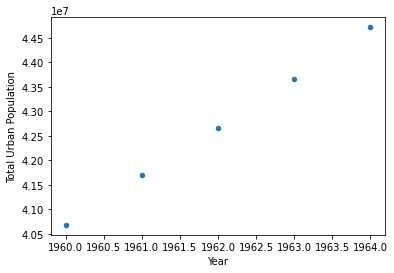

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Code from previous exercise
urb_pop_reader = pd.read_csv(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

# Ejercicio: Writing an iterator to load data in chunks (4)

### En los ejercicios anteriores, solo procesó los datos del primer fragmento de DataFrame. Esta vez, agregará los resultados de todos los fragmentos de DataFrame en el conjunto de datos. Básicamente, esto significa que ahora estará procesando todo el conjunto de datos. ¡Esto es genial porque podrá procesar todo el conjunto de datos grande simplemente trabajando en partes más pequeñas!

<ipython-input-4-992c33367e66>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


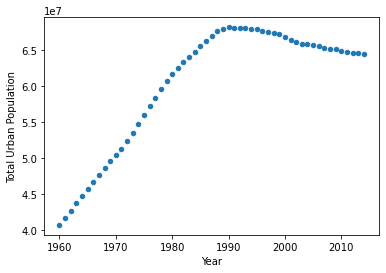

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

# Ejercicio: Writing an iterator to load data in chunks (5)

###  En este último ejercicio, pondrá todo el código para procesar los datos en una única función para que pueda reutilizar el código sin tener que volver a escribir las mismas cosas.

### Va a definir la función plot_pop () que toma dos argumentos: el nombre del archivo que se procesará y el código de país de las filas que desea procesar en el conjunto de datos.

<ipython-input-6-797e9244dac3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


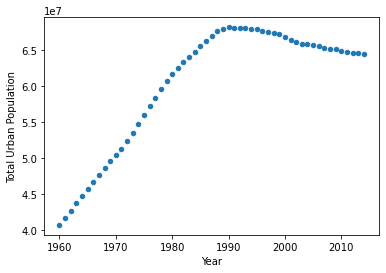

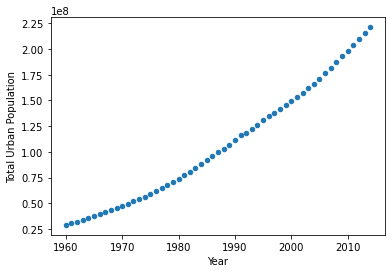

In [6]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(r'G:\PythonLiliBasicos\datasets\world_ind_pop_data.csv', 'ARB')
